# All-in-one Practice (Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tối đa là 100 cột
pd.set_option('display.max_columns', 100)

In [2]:
plt.style.use("seaborn-whitegrid")

## 1. Overview

Data overview

- Data về housing prices tại các district trong California
- Observational units là district (not individual house)
- Real estate agent (chuyên viên môi giới bất động sản)
- Regression (*): 
    - Predict (dựa vào datatype của outcome):
        - Classification: dựa vào categorical
        - Regression: bài toán là continous

Notes on predictive modeling

- Regression: housing price, salary, temperature, wind speed
- Classification: discrete/categorical (few distinct value)
    - Bad debt: good/bad (0/1) - Binary classification
    - Churn prediction: telco, subscription
    - Muticlass: predict professional (not common)

## 1. Load and inspect
EDA: exploratory data analysis

In [3]:
# Load
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Shape
df.shape

(20640, 10)

In [5]:
# Head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Terms
 - `median_house_value`: outcome/ target
 -  Other columns: features/ attributes
 - Feature engineering: design features

In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Check missings
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Tính phần trăm missings
df.isnull().mean() * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [9]:
# Investigate categorical columns
df["ocean_proximity"].value_counts(normalize = True) * 100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

In [10]:
# Categorical vars


## 2. Explore Data Analysis (EDA)

In [11]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### Investigate numeric variables

- Histogram/ KDEs
- Boxplots
- Scatter plots

In [12]:
# Extract numeric var
df_num = df.select_dtypes("number").copy()
df_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


/var/folders/gx/0xqp3mnx7vl_hw5j6gyp9wfm0000gn/T/ipykernel_42809/1133657069.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nrows, ncols, i +1)


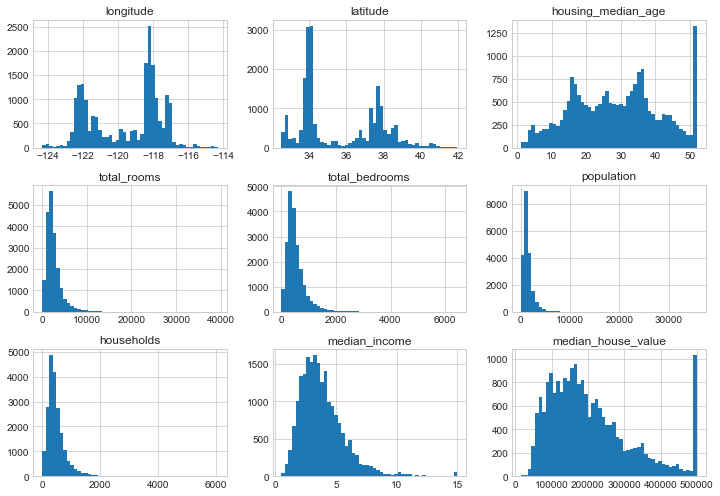

In [13]:
# Plot histograms
fig = plt.figure(figsize = (10,7))
# Đầu tiên lấy số cột là 3
ncols = 3
# Lấy số dòng bằng cách lấy shape(1) -> số cột chia cho 3 
# Sau đó dùng hàm ceil để lấy dư ra lỡ như nó 10 cột 
# không chia hết cho 3 thì còn lấy dư ra 
nrows = np.ceil(df_num.shape[1]/ncols)


# Sau đó for qua các cột
for i,c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i +1)
    df_num[c].plot.hist(bins = 50, ax=ax)
    
    #Decorate
    ax.set_title(c)
    ax.set_ylabel(None)

plt.tight_layout()
plt.show()


#### Comment
- `housing_median_age`, `median_house_value` có vẽ đị capped ở bên phải (peak at the end)

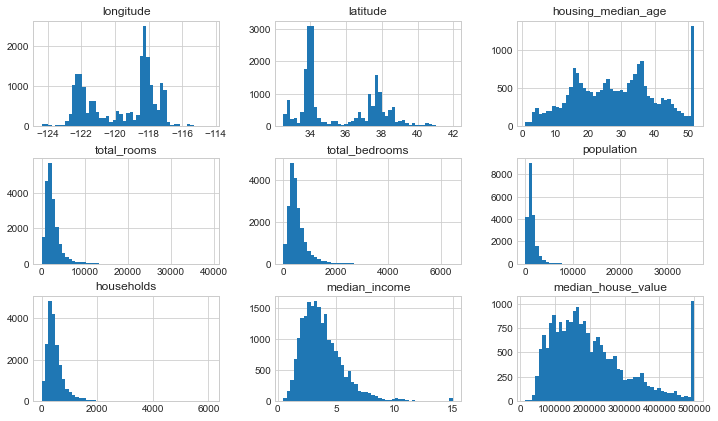

In [14]:
# Plot boxplots 
plt.rcParams["figure.figsize"] = (12,7) # figsize
df_num.hist(bins = 50)
plt.show()

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Finding: any comment?

### Plot satter plots

#### Ver 1
- x: lat
- y: long

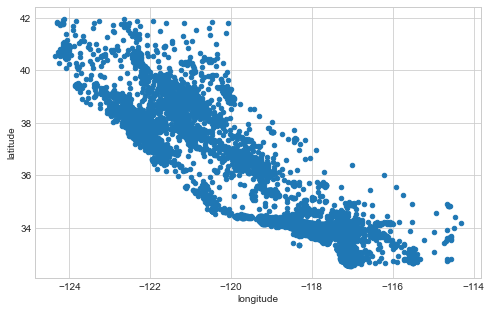

In [16]:
# Code
fig, ax = plt.subplots(figsize = (8,5))
df.plot.scatter( x = "longitude", y = "latitude", ax = ax )
plt.show()

Scatter plot customization:

   - Point shape, size, color, opacity
   - Line linestyle, linewidth, corlor, opacity
 

#### Ver 2
- Set alpha cho point để giảm density

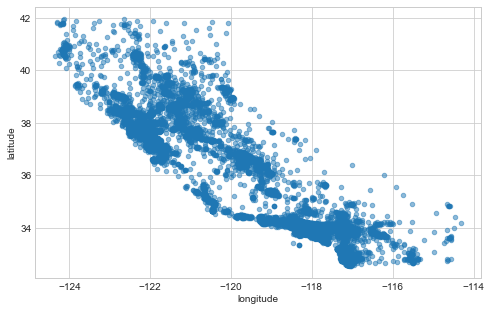

In [17]:
# Code
fig, ax = plt.subplots(figsize = (8,5))
df.plot.scatter( 
    x = "longitude", 
    y = "latitude", 
    alpha = .5,
    ax = ax )
plt.show()

#### Ver 3
- Thể hiện population qua size

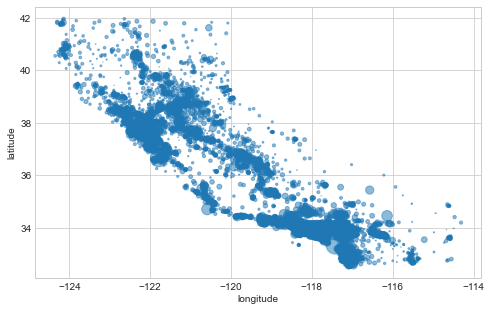

In [18]:
# Code
fig, ax = plt.subplots(figsize = (8,5))
df.plot.scatter( 
    x = "longitude", 
    y = "latitude", 
    alpha = .5,
    s = df["population"] / 100,
    ax = ax )
plt.show()

#### Ver 4
- Thêm màu sắc thể hiện housing prices

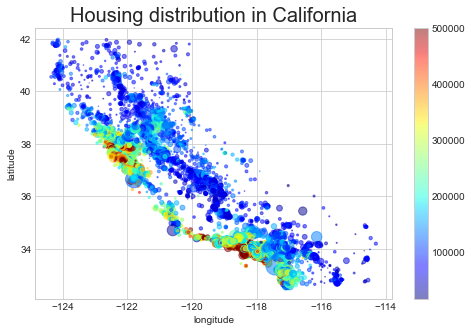

In [19]:
# Code
fig, ax = plt.subplots(figsize = (8,5))
df.plot.scatter( 
    x = "longitude", 
    y = "latitude", 
    alpha = .5,
    s = df["population"] / 100,
    c = df['median_house_value'],
    cmap = plt.get_cmap("jet"),
    ax = ax )

ax.set_title("Housing distribution in California", fontsize = 20)
plt.show()

#### Remarks:
- Giá nhà có liên quan chặt chẽ vị trí gần biển hay không (từ khu phía Bắc California - possible reason: cold weather)
    - Đông dân có xu hướng giá nhà cao hơn
    - Gần biển có xu hướng giá nhà cao hơn

### Scatter plots of other variables with house values

In [20]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [21]:
# Code
cols = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "median_income",
    "median_house_value"
    
]

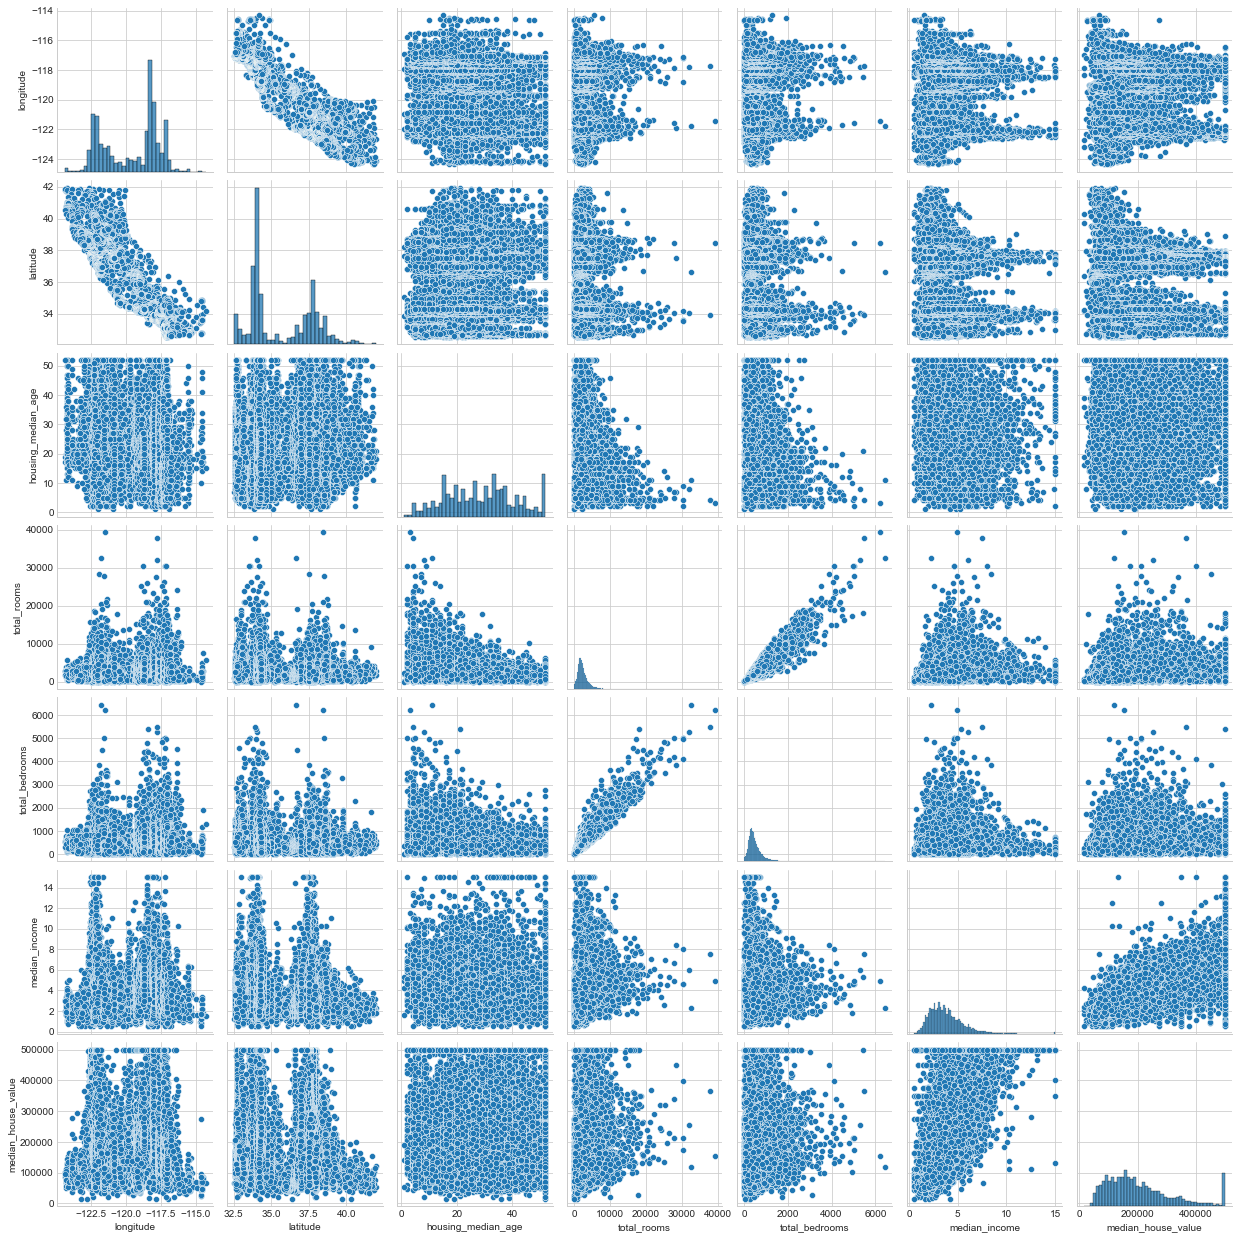

In [22]:
sns.pairplot(df[cols])
plt.show()

#### Remarks
- `median_income`, `total_rooms`, `total_bedroms` seems to be good predictors for housing prices
- `total_room` and `total_bedrooms` are strongly correlated -> combine them?

### Zoom in median_income vs median_house_value

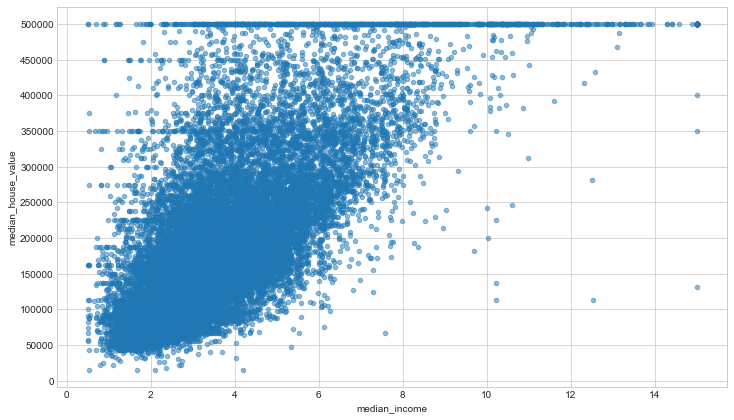

In [23]:
# Code
fig , ax = plt.subplots()

df.plot.scatter(
    x = "median_income",
    y = "median_house_value",
    alpha = 0.5,
    ax = ax
)

max_price = df["median_house_value"].max()
yticks = np.arange(0, max_price, 50000)
ax.set_yticks(yticks)
plt.show()

#### Remak
- Data seem to be capped at 50000
- Solution:
    - Remove those points
    - Or research and obtain the accurate price

### Compute correlation

In [24]:
# Code
df.corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [25]:
df.corr()["median_house_value"].abs().sort_values(ascending = False)


median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

=> Ta có thể thấy khi sort value cần phải bỏ giá trị tuyệt đối để xem mức độ tương quan của các cột với `median house value`. Nhìn thứ tự trên ta có thể thấy top 5 liên quan đến taget của bài 

=> Trong phân tích trên các giá trị âm càng cao thì cái median house value càng thấp

=> `latitude` càng cao tức là càng đi lên phía Bắc giá nhà càng giảm

## 3. Derive features
(feature engineering)
3 addtion features

1. rooms per household => Mỗi hộ có bao nhiêu nhà
2. bedrooms per room => Mỗi phòng có giao nhiêu phòng ngủ
3. population per household 

In [26]:
# Code
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/ df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [27]:
# Preview results
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260


In [28]:
# Review correlation
# Anything change?
df.corr()["median_house_value"].abs().sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
bedrooms_per_room           0.255880
rooms_per_household         0.151948
latitude                    0.144160
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
longitude                   0.045967
population                  0.024650
population_per_household    0.023737
Name: median_house_value, dtype: float64

In [29]:
df.corr()["median_house_value"]

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049686
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_room          -0.255880
population_per_household   -0.023737
Name: median_house_value, dtype: float64

### Check missing data

In [30]:
# Code
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [31]:
# Code
df.isnull().mean() * 100

longitude                   0.000000
latitude                    0.000000
housing_median_age          0.000000
total_rooms                 0.000000
total_bedrooms              1.002907
population                  0.000000
households                  0.000000
median_income               0.000000
median_house_value          0.000000
ocean_proximity             0.000000
rooms_per_household         0.000000
bedrooms_per_room           1.002907
population_per_household    0.000000
dtype: float64

In [32]:
null_data = df.loc[df["total_bedrooms"].isnull() == True, :].copy()
null_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,4.646983,NaN,4.070603
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,3.140420,NaN,2.543307
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,6.367713,NaN,2.542601
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,6.771499,NaN,3.358722


#### Để sử lý các giá trị null thường sẽ có hai cách:
- Keep
    - Tìm lại giá trị đúng (sẽ rất khó tìm)
    - Imputation (cố găng replace một giá trị hợp lý nhất)
- Remove

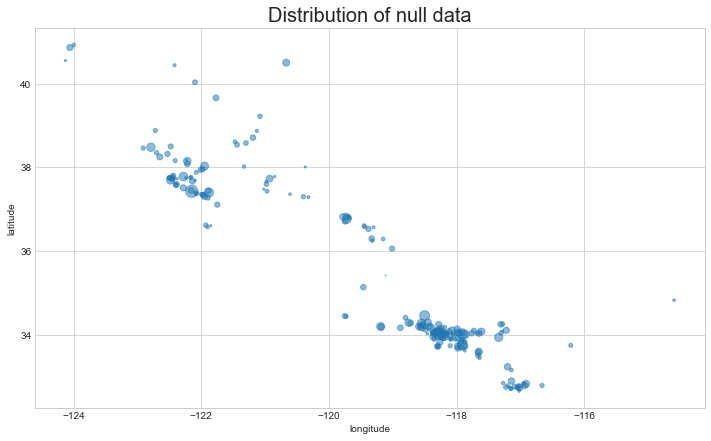

In [33]:
# Plot missing
fig, ax = plt.subplots()

null_data.plot.scatter(
    x = "longitude",
    y = "latitude",
    alpha = .5,
    s = null_data["population"] / 50,
    ax = ax
)
ax.set_title("Distribution of null data", fontsize = 20)
plt.show()

In [34]:
# Imputation/drop


## 4. Preprocess data to train the model
### Remove NA
- Other consideration: imputation with median values

In [35]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [36]:
df.shape

(20640, 13)

In [37]:
# Read 
df = pd.read_csv("../data/housing.csv")

In [38]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [39]:
# Drop NA
df.dropna(how = "any", inplace = True)


In [40]:
# Sanity check
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### One-hot encoding categorical features

In [41]:
# Code
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [42]:
ocean_data = pd.get_dummies(df["ocean_proximity"], drop_first = True)
ocean_data.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [43]:
#Combine with the original data
df = df.join(ocean_data)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0


In [44]:
# Drop column ocean_proximity
df.drop(columns = ["ocean_proximity"], inplace = True)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0


In [45]:
# Double check
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

In [46]:
# Make sure there is non-numeric columns
df.select_dtypes("O").columns.tolist()

[]

### Add features

In [47]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [48]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,8.288136,0.129516,2.802260


- Phase 1: load data, inspect, understand columns, null values,...
- Phase 2: EDA: distribution columns
    - Unvariate:
        - Countinous: hist, kde, boxplot...
        - Categorical: freq dist, barplot,..
    - Bivariate:
        - Cont-cont: scatter plot
        - Cat cont: hist, kde, boxplot(each level)
    - Multivariate:
        - Custimization: color, size, shape, linestyle, opacity
    - Correlation
    - Feature engineer and test intuition
    - Note: takeaways
- Phase 3: preprocess
    - missing value handling (drop, impute)
    - convert cat -> cont
    - normalize (log scale,...)
- Phase 4: Modeling
    - Finalize a set features
    - Select a model
    - Train,...

## Modeling
### Model 
- model = simplified version of reality
- ```
    income = f(age, educ, exp)
    y = f(x1, x2, x3) = b0 + b1x1 + b2x2 + b3x3
```

=> Model = Algorithm (OLS + Linear Rgression) + Data

### Train a model 
- Step 1: Select algorithm (linear regression)
- Step 2: Feed data -> learned parameters
- Step 3: Evaluate (test on test data)
- Train- test splittings: 
    1. Train (80%)
    2. Test (20%)

## 5. Train models

#### Split train test
- Slpit input (X) and target (Y)

In [49]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,6.238137,0.155797,2.109842


In [50]:
df.shape

(20433, 16)

In [51]:
# Get features
# Exclude label
X = df.drop(columns = ["median_house_value"]).copy()

In [52]:
X.shape

(20433, 15)

In [53]:
X.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0,6.238137,0.155797,2.109842


In [54]:
# Get label
y = df["median_house_value"].copy()

#### Split, Train
- Train 
- Test

In [55]:
# Select a model
from sklearn.model_selection import train_test_split

In [56]:
# Train
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 1  # Seed
)

In [57]:
# Double check size
print(X_train.shape)
print(X_test.shape)

(15324, 15)
(5109, 15)


### Train model

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
# Initiate model
model_1 = LinearRegression() # Theory = a0 + a1x1 + ... + x15x15

In [60]:
# Train (fit data to the model to learn the parameters)
model_1.fit(X_train, y_train) 

LinearRegression()

### View trained models

In [61]:
model_1.intercept_

-2471543.21588212

In [62]:
# Coefficients
model_1.coef_

array([-2.81366749e+04, -2.66744945e+04,  1.08013950e+03,  1.31670628e+00,
        1.53942179e+01, -3.87207335e+01,  1.03943834e+02,  4.09908119e+04,
       -3.42935300e+04,  1.38297215e+05, -3.07716603e+03,  4.49891289e+03,
        3.49849195e+03,  2.72566949e+05,  4.72397993e+01])

In [63]:
len(model_1.coef_)

15

- house_price = `-2471543.21588212 + -2.81366749e+04*longtitude , -2.66744945e+04*latitude + ... + 4.72397993e+01*x15 `

### Make prediction using the trained model

In [64]:
# Predict
y_pred_1 = model_1.predict(X_test)

In [65]:
X_test.shape

(5109, 15)

## RMSE - root mean square error : Xem thử nó đoán đúng hay đoán sai
### Evaluate the model

In [66]:
y_train.mean() # Base line

206489.63697468024

In [67]:
# AVG model RMSE
y_pred_0 = np.full(y_test.shape, y_train.mean())

In [68]:
# Cách làm tay
np.sqrt(sum((y_pred_0 - y_test)**2) / len(y_pred_0))

117054.0386977329

In [69]:
# Code
residuals_0 = y_test - y_pred_0
residuals_0[:10]

6715     154410.363025
4121      85010.363025
15433    -75189.636975
20272    293511.363025
11843    -87689.636975
1398     -16889.636975
1838     -43989.636975
1902     -71789.636975
18586    -14289.636975
11765    -27089.636975
Name: median_house_value, dtype: float64

In [70]:
#RMSE
np.sqrt(sum(residuals_0**2) / y_test.shape[0])

117054.0386977329

### Calculate using sklearn

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
# For model 0
np.sqrt(mean_squared_error(y_test, y_pred_0))

117054.03869773263

In [95]:
# Residuals
print(residuals_0.abs().mean())
print(residuals_0.abs().std())

92090.95961121324
72262.88976047133


### Model 1: Linear Reg

In [77]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred_1))

67819.28235577859

- Better than model 0

In [78]:
# Residuals
y_pred_1 = model_1.predict(X_test)
residuals_1 = y_test - y_pred_1

In [79]:
# Residuals
print(residuals_1.abs().mean())
print(residuals_1.abs().std())

48932.688321842994
46962.525037186526


### Plots

In [80]:
y_pred_1

array([382829.12476012, 275008.69878524, 154075.76898951, ...,
       240287.83504295, 165926.86314872, 214294.64253093])

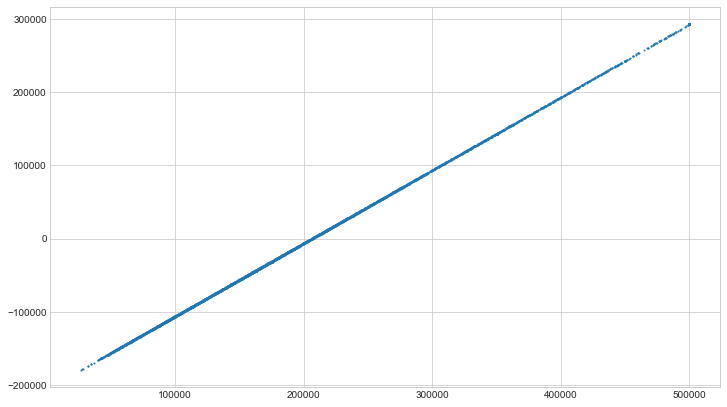

In [96]:
# Model 0
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_0, s=1)
plt.show()

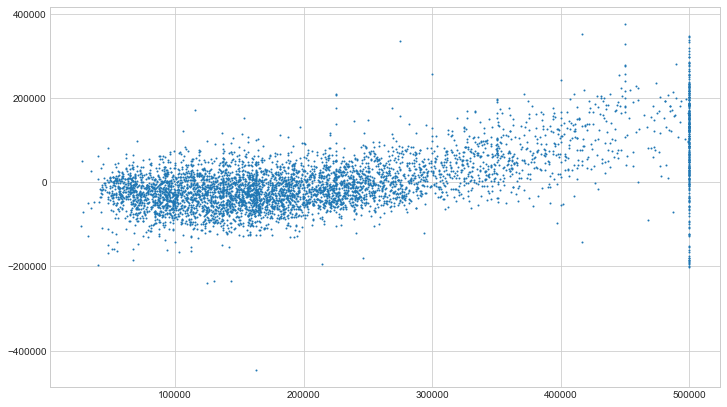

In [82]:
# Model 1
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_1, s=1)
plt.show()

## Try another model 

In [83]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

In [86]:
# Initiate and fit model 2
model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
# Predict using RF
y_pred_2 = model_2.predict(X_test)

In [89]:
# Residuals of model 2
residuals_2 = y_test - y_pred_2

In [92]:
# Model_1 RMSE (Liner Reg) 
np.sqrt(mean_squared_error(y_test, y_pred_1))

67819.28235577859

In [91]:
# Model_2 RMSE (random Reg)
np.sqrt(mean_squared_error(y_test, y_pred_2))

49801.87172564589

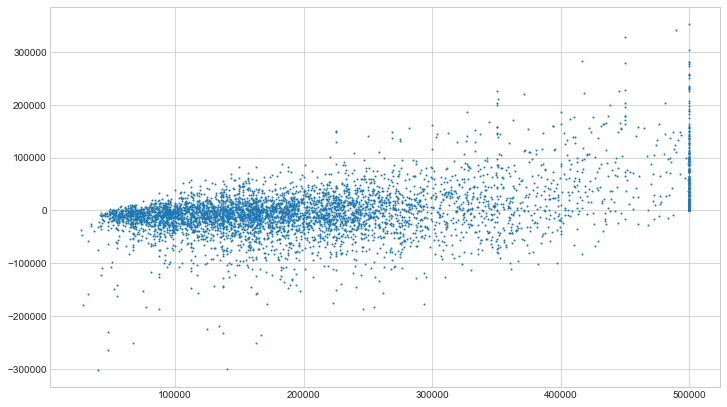

In [94]:
# Model 2
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_2, s=1)
plt.show()